# **Import libraries**

In [3]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16 

from tensorflow.keras import layers


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Set all the Constants**

In [5]:
BATCH_SIZE = 10
IMAGE_SIZE = 256
EPOCHS = 50

#### You can see now that in the dataset. There are no masks present.

# **Function to Split Dataset**

In [ ]:
## The dataset is uploaded to the Google drive of dataset2 and code is ran here 

In [ ]:
#!pwd

/content


In [ ]:
#!unzip '/content/drive/MyDrive/Dataset2.zip' -d './'

Archive:  /content/drive/MyDrive/Dataset2.zip
   creating: ./Dataset2/
   creating: ./Dataset2/benign/
  inflating: ./Dataset2/benign/benign (1).png  
  inflating: ./Dataset2/benign/benign (10).png  
  inflating: ./Dataset2/benign/benign (100).png  
  inflating: ./Dataset2/benign/benign (101).png  
  inflating: ./Dataset2/benign/benign (102).png  
  inflating: ./Dataset2/benign/benign (103).png  
  inflating: ./Dataset2/benign/benign (104).png  
  inflating: ./Dataset2/benign/benign (105).png  
  inflating: ./Dataset2/benign/benign (106).png  
  inflating: ./Dataset2/benign/benign (107).png  
  inflating: ./Dataset2/benign/benign (108).png  
  inflating: ./Dataset2/benign/benign (109).png  
  inflating: ./Dataset2/benign/benign (11).png  
  inflating: ./Dataset2/benign/benign (110).png  
  inflating: ./Dataset2/benign/benign (111).png  
  inflating: ./Dataset2/benign/benign (112).png  
  inflating: ./Dataset2/benign/benign (113).png  
  inflating: ./Dataset2/benign/benign (114).png  
 

## Dataset importing new method

In [6]:
train_path = './https://drive.google.com/drive/folders/1ylH6X28mm4aoRwNapVGwGx-qUD_X9uqi?usp=share_link'

In [7]:
train_gen = ImageDataGenerator( rescale=1./255,
                                horizontal_flip=True,
                                validation_split=0.1 )

In [8]:
# creating two classes Benign and Malignant
# ignoring Normal to have same type of approach as features models
train_batches = train_gen.flow_from_directory(train_path,target_size=(IMAGE_SIZE,IMAGE_SIZE),classes= ['benign','malignant'], batch_size = BATCH_SIZE , subset='training')


Found 0 images belonging to 2 classes.


In [ ]:
valid_batches = train_gen.flow_from_directory(train_path,target_size=(IMAGE_SIZE,IMAGE_SIZE),classes= ['benign','malignant'], batch_size = 1 , subset='validation')

Found 77 images belonging to 3 classes.


# **Xception: Building the Model**

In [ ]:
base_model = tf.keras.applications.Xception(input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

### Transfer learning performs better than freezing the weights of pretrained network

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 256 hidden units and relu activation
x = layers.Dense(256, activation='relu')(x)

# Add a dropout rate of 0.1
# to replace this line of code with something else
x = layers.Dropout(0.1)(x)

# classification output
x = layers.Dense(2, activation='softmax')(x)

model= tf.keras.models.Model(base_model.input, x)

opt= Adam(learning_rate=0.001)
##opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer =opt, 
              loss = 'categorical_crossentropy',metrics = ['acc'])

In [ ]:
loss = []
val_loss = []
acc = []
val_acc = []

for epoch in range (0,EPOCHS):
    print('############################ EPOCH NUMBER == ' +str(epoch))
    history = model.fit_generator(train_batches, steps_per_epoch = train_batches.samples // BATCH_SIZE , epochs = 1, validation_data = valid_batches , validation_steps = train_batches.samples)
    
    # Multiple models i.e. model on each epoch shall be saved. 
    # In the inference we shall use the best val_acc model
    model.save(str(history.history['val_acc'][0])+'_'+str(epoch)+'.h5')

    loss.append(history.history['loss'][0])
    val_loss.append(history.history['val_loss'][0])
    acc.append(history.history['acc'][0])
    val_acc.append(history.history['val_acc'][0])

############################ EPOCH NUMBER == 0


<ipython-input-81-c846ecf2ada1>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_batches, steps_per_epoch = train_batches.samples // BATCH_SIZE , epochs = 1, validation_data = valid_batches , validation_steps = train_batches.samples )


70/70 [==============================] - ETA: 0s - loss: 1.6056 - acc: 0.5541

70/70 [==============================] - 101s 314ms/step - loss: 1.6056 - acc: 0.5541 - val_loss: 1.3854 - val_acc: 0.4935
############################ EPOCH NUMBER == 1
70/70 [==============================] - ETA: 0s - loss: 1.0620 - acc: 0.5354

70/70 [==============================] - 22s 313ms/step - loss: 1.0620 - acc: 0.5354 - val_loss: 1.0670 - val_acc: 0.4935
############################ EPOCH NUMBER == 2
70/70 [==============================] - ETA: 0s - loss: 0.9014 - acc: 0.6104

70/70 [==============================] - 23s 320ms/step - loss: 0.9014 - acc: 0.6104 - val_loss: 0.7413 - val_acc: 0.5714
############################ EPOCH NUMBER == 3
70/70 [==============================] - ETA: 0s - loss: 0.8846 - acc: 0.6349

70/70 [==============================] - 25s 359ms/step - loss: 0.8846 - acc: 0.6349 - val_loss: 1.4969 - val_acc: 0.5974
############################ EPOCH NUMBER == 4
70/70 [==============================] - ETA: 0s - loss: 0.7979 - acc: 0.6551

70/70 [==============================] - 22s 317ms/step - loss: 0.7979 - acc: 0.6551 - val_loss: 1.3848 - val_acc: 0.6494
############################ EPOCH NUMBER == 5
70/70 [==============================] - ETA: 0s - loss: 0.6396 - acc: 0.7475

70/70 [==============================] - 23s 324ms/step - loss: 0.6396 - acc: 0.7475 - val_loss: 1.6936 - val_acc: 0.4416
############################ EPOCH NUMBER == 6
70/70 [==============================] - ETA: 0s - loss: 0.5564 - acc: 0.7749

70/70 [==============================] - 22s 319ms/step - loss: 0.5564 - acc: 0.7749 - val_loss: 0.8629 - val_acc: 0.5455
############################ EPOCH NUMBER == 7
70/70 [==============================] - ETA: 0s - loss: 0.5090 - acc: 0.8066

70/70 [==============================] - 21s 303ms/step - loss: 0.5090 - acc: 0.8066 - val_loss: 1.0151 - val_acc: 0.7013
############################ EPOCH NUMBER == 8
70/70 [==============================] - ETA: 0s - loss: 0.3869 - acc: 0.8615

70/70 [==============================] - 21s 303ms/step - loss: 0.3869 - acc: 0.8615 - val_loss: 1.8898 - val_acc: 0.6494
############################ EPOCH NUMBER == 9
70/70 [==============================] - ETA: 0s - loss: 0.4030 - acc: 0.8528

70/70 [==============================] - 23s 323ms/step - loss: 0.4030 - acc: 0.8528 - val_loss: 1.2708 - val_acc: 0.7532
############################ EPOCH NUMBER == 10
70/70 [==============================] - ETA: 0s - loss: 0.3672 - acc: 0.8773

70/70 [==============================] - 23s 319ms/step - loss: 0.3672 - acc: 0.8773 - val_loss: 1.3583 - val_acc: 0.6753


KeyboardInterrupt: ignored

# **Plot the training and validation errors & accuracy vs. epochs.**

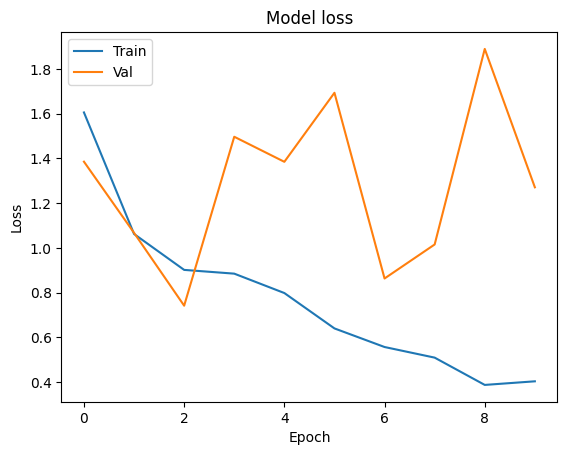

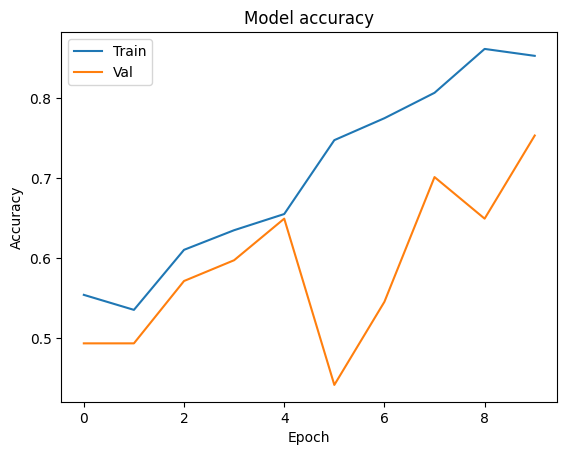

In [ ]:
# Plot training & validation loss values
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# **Run prediction on a sample train image**

1/1 [==============================] - 0s 27ms/step


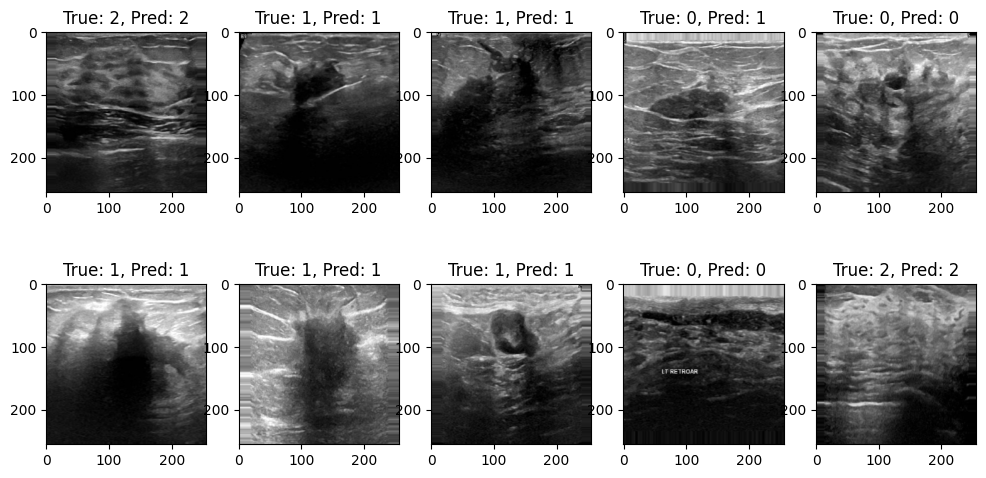

In [ ]:
# Get a batch of image data from the generator
x_batch, y_batch = train_batches.next()

# Infer the labels for the images using the model
y_pred = model.predict(x_batch)

# Convert the one-hot encoded labels back to class labels
y_true = np.argmax(y_batch, axis=1)
y_pred = np.argmax(y_pred, axis=1)

# Visualize the first 10 images in the batch and their predicted labels
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_batch[i])
    ax.set_title(f"True: {y_true[i]}, Pred: {y_pred[i]}")
plt.show()

## Validation Data inference on the model

1/1 [==============================] - 0s 21ms/step


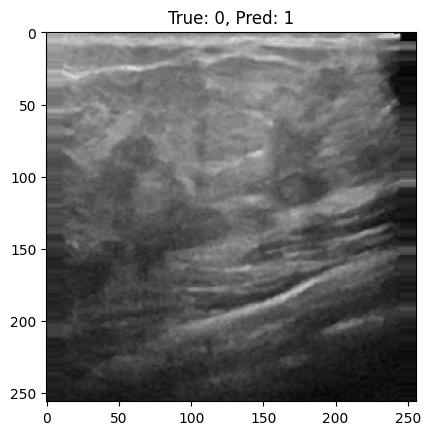

1/1 [==============================] - 0s 26ms/step


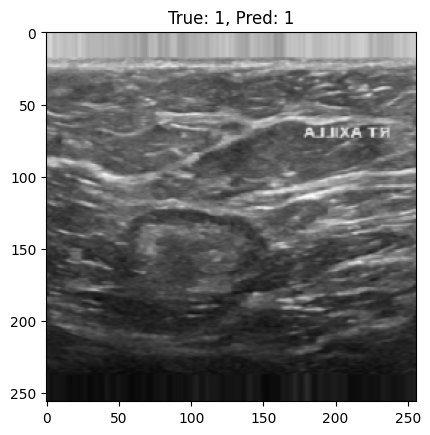

1/1 [==============================] - 0s 39ms/step


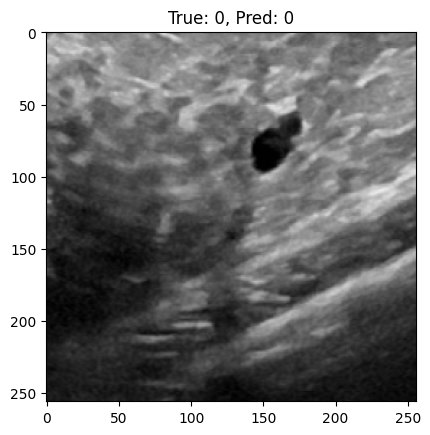

1/1 [==============================] - 0s 23ms/step


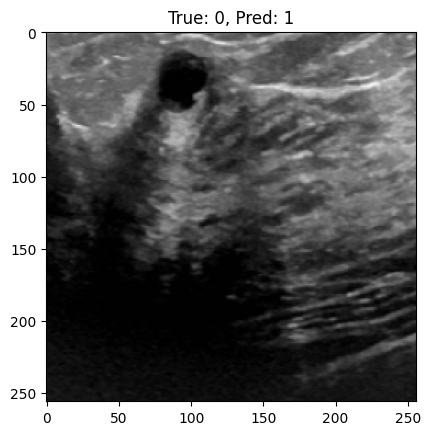

1/1 [==============================] - 0s 23ms/step


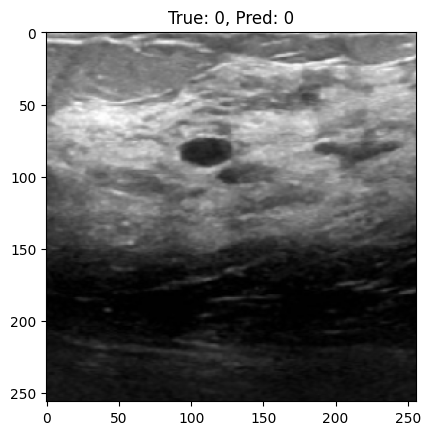

1/1 [==============================] - 0s 23ms/step


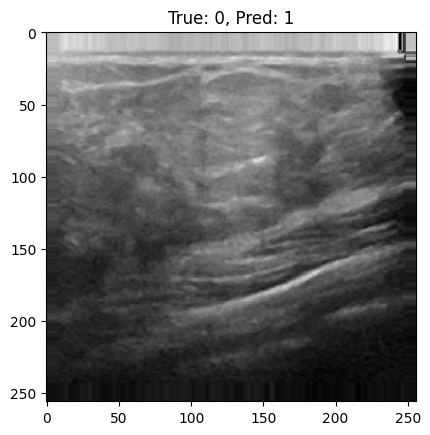

1/1 [==============================] - 0s 22ms/step


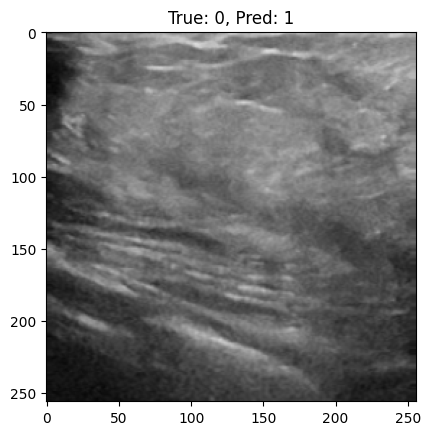

1/1 [==============================] - 0s 23ms/step


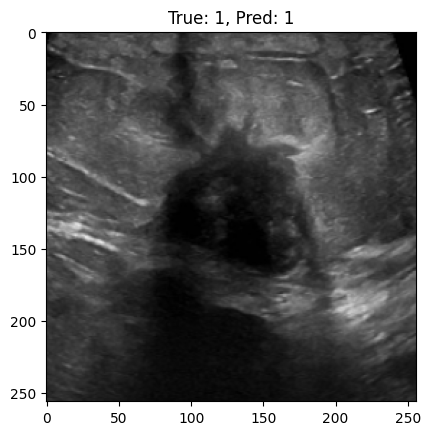

1/1 [==============================] - 0s 25ms/step


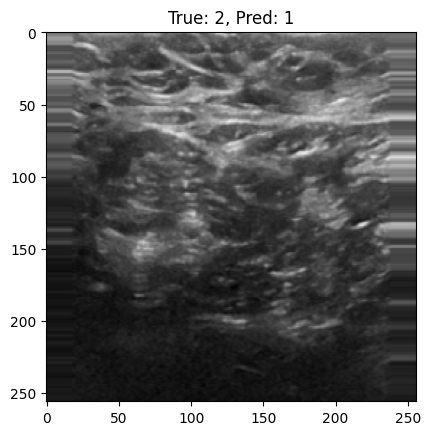

1/1 [==============================] - 0s 23ms/step


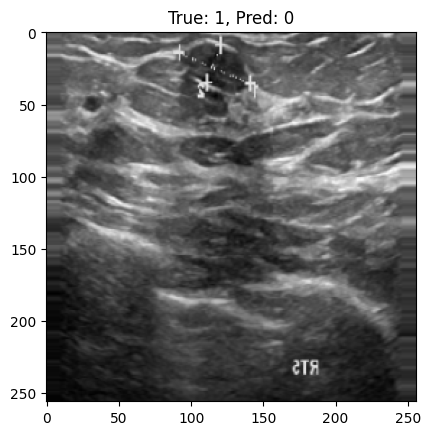

In [ ]:
# Define the number of iterations
num_iterations = 10

# Iterate over the generator for num_iterations
for i in range(num_iterations):
    # Get a batch of image data from the generator
    x_batch, y_batch = valid_batches.next()

    # Infer the labels for the images using the model
    y_pred = model.predict(x_batch)

    # Convert the one-hot encoded labels back to class labels
    y_true = np.argmax(y_batch, axis=1)
    y_pred = np.argmax(y_pred, axis=1)

    # Visualize the first image in the batch and its predicted label
    plt.imshow(x_batch[0])
    plt.title(f"True: {y_true[0]}, Pred: {y_pred[0]}")
    plt.show()

## Plot Confusion Matrix on Validation Data

1/1 [==============================] - 0s 21ms/step


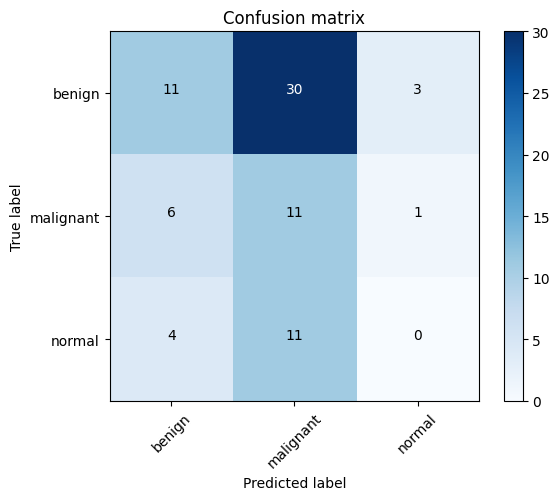

In [ ]:
# Define the number of validation samples
num_val_samples = len(valid_batches.filenames)

# Get the true labels for all the validation samples
y_true = []
for i in range(num_val_samples):
    _, y_batch = valid_batches.next()
    y_true.extend(np.argmax(y_batch, axis=1))

# Get the predicted labels for all the validation samples
y_pred = []
for i in range(num_val_samples):
    x_batch, _ = valid_batches.next()
    y_pred.extend(np.argmax(model.predict(x_batch), axis=1))

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()

# Add the class labels to the plot
class_names = valid_batches.class_indices.keys()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add the values to the plot
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

# Add labels and title to the plot
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()